### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [25]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Change train and test labels into one-hot vectors

In [0]:
train_labels_encoded=tf.keras.utils.to_categorical(train_labels)
test_labels_encoded=tf.keras.utils.to_categorical(test_labels)

#### Build the Graph

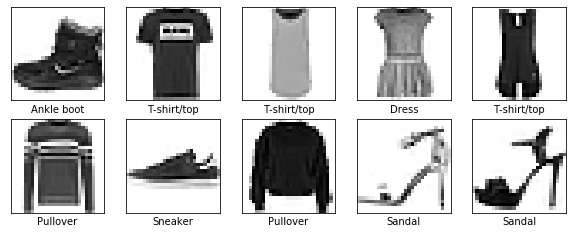

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.backend import clear_session

In [0]:
#Normalise Data
# convert from integers to floats
train_images_norm = train_images.astype('float32')
test_images_norm = test_images.astype('float32')
# normalize to range 0-1
train_images_norm = train_images_norm / 255.0
test_images_norm = test_images_norm / 255.0

#Reshape Data
from tensorflow.keras.backend import expand_dims
train_images_reshaped = train_images_norm.reshape((train_images_norm.shape[0], 784))
test_images_reshaped = test_images_norm.reshape((test_images_norm.shape[0], 784))

#using DNN
#Clear out tensorflow memory
clear_session()

#Initialize Sequential model
model = Sequential()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Add 2nd hidden layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [32]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)

model.fit(train_images_reshaped,train_labels_encoded,          
          validation_data=(train_images_reshaped,train_labels_encoded),
          epochs=10,
          batch_size=32, callbacks=[mckpt])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.5714 - accuracy: 0.7936 - val_loss: 0.4108 - val_accuracy: 0.8511
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4246 - accuracy: 0.8449 - val_loss: 0.3485 - val_accuracy: 0.8693
Epoch 3/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3925 - accuracy: 0.8559 - val_loss: 0.3307 - val_accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3685 - accuracy: 0.8645 - val_loss: 0.3020 - val_accuracy: 0.8874
Epoch 5/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3561 - accuracy: 0.8687 - val_loss: 0.2889 - val_accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3409 - accuracy: 0.8737 - val_loss: 0.2850 - val_accuracy: 0.8918
Epoch 7/10
60000/60000 [=========================

Reporting final accuracy

In [33]:
test_loss, test_acc = model.evaluate(test_images_reshaped,  test_labels_encoded, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3349 - accuracy: 0.8784

Test accuracy: 0.8784


In [0]:
predictions = model.predict(train_images_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

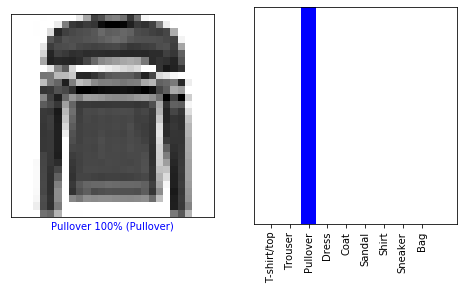

In [35]:
# Predicting one of the images
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], train_labels, train_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  train_labels)
plt.show()

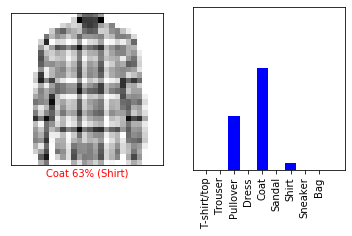

In [36]:
#checking for other values
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Inference: Model accuracy at 87.84% was able to 100% predict pullover however was able to predict only 40% shirt. The model can still be improved by adding momentum and nesterov